# Crime EDA

## Primary question

Our primary question that will drive our data exploration, posed from the Mayor of Charlotte, North Carolina who is up for re-election in two years. She wants measureable (and visible) results so she can begin to campaign on her accomplishments next year.

What policy measures can be undertaken that will reduce crime rate crime the most?

Secondary questions: Are crime rates higher or lower in Charlotte that in other counties? What counties have the highest levels of crime? Which have the lowest?

## Variables

The crime_v2 dataset provided by (political organization) for this study includes 25 variables of interest..

These variables include..

<center>Data Dictionary</center>

Category | Variable
---------- | -------------------------------
Crime Rate | crmrte
Local Revenue  | taxpc
Geographic | county, west, central
Demographic | urban, density, pctmin80, pctymle
Economic | wcon, wtuc, wtrd, wfir, wser, wmfg, wfed, wsta, wloc
Encounters with Police | polpc, prbarr, prbconv, mix
Judicial/Conviction | prbpris, avgsen
Time Period | year

<center>Table 1: Data Dictionary</center>

## Data Prep

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
dfCrime = read.csv("crime_v2.csv")

In [3]:
str(dfCrime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [4]:
head(dfCrime)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [5]:
tail(dfCrime)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
summary(dfCrime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

First, we note there are missing rows in the dataset that were imported. We'll remove those rows now.

In [7]:
nrow(dfCrime)
dfCrime <-na.omit(dfCrime) # omit the NA rows
nrow(dfCrime)

[1] 97

[1] 91

Next, we will inspect the data to see if there are duplicate records

In [8]:
dfCrime[duplicated(dfCrime),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


A duplicate row exists. We'll remove it.

In [9]:
dfCrime <- dfCrime[!duplicated(dfCrime),] # remove the duplicated row
nrow(dfCrime)

[1] 90

We also saw that pbconv was coded as a level. It is not a level but a ratio. We'll change that now.

In [10]:
dfCrime$prbconv<-as.numeric(levels(dfCrime$prbconv))[dfCrime$prbconv]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

We also notice by comparision of pctymle and pctmin80 one of the variables is off by a factor of 100. We will divide pctmin80 by 100 so the two variables are in the same unit terms.

In [11]:
dfCrime$pctmin80<-dfCrime$pctmin80/100

County was expressed as a number. However, it is a categorical variable and we will convert it to a factor instead.

In [12]:
dfCrime$county<-as.factor(dfCrime$county)

Next we inspect the indicator variables to see if they were coded correctly.

In [13]:
dfCrime %>% group_by(west, central) %>% tally()

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

west,central,n
0,0,35
0,1,33
1,0,21
1,1,1


One county was either mis-coded, or it truly belongs to both regions. However, this is very unlikely as the intended technique is to widen the data and introduce indicator variables for each category. It is not likley the data was captured for both categories.

We will need further analysis to decide what to do with this datapoint.

For now, we will encode a new region variable and place this datapoint in its own category. 

In [14]:
#Map central and west to a region code, and create a new category for other
# Note that county 71 has both western and central codes
dfCrime$region <- case_when (
            (dfCrime$central ==0 & dfCrime$west ==0) ~ 0, #Eastern, Coastal, Other
            (dfCrime$central ==0 & dfCrime$west ==1) ~ 1, #Western
            (dfCrime$central ==1 & dfCrime$west ==0) ~ 2, #Central
            (dfCrime$central ==1 & dfCrime$west ==1) ~ 3, #Central-Western border county - this could be Charlotte or it could be a coding error.
        )

By way of the 1980 Census fact sheet, we discover the urban field is an encoding for SMSA (Standard Metropolitan Statistical Areas). https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
The value is one if the county is inside a metropolitan area. Otherwise, if the county is outisde a metropolitan area, the value is zero.
We create a metro factor variable to better describe this feature.

In [15]:
# create factor for SMSA (standard metropolitan statistical areas) with two levels - inside or outside
#    https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
dfCrime$metro =
            factor( dfCrime$urban , levels = 0:1 , labels =
                    c( 'Outside',
                       'Inside'
                      )
                   )

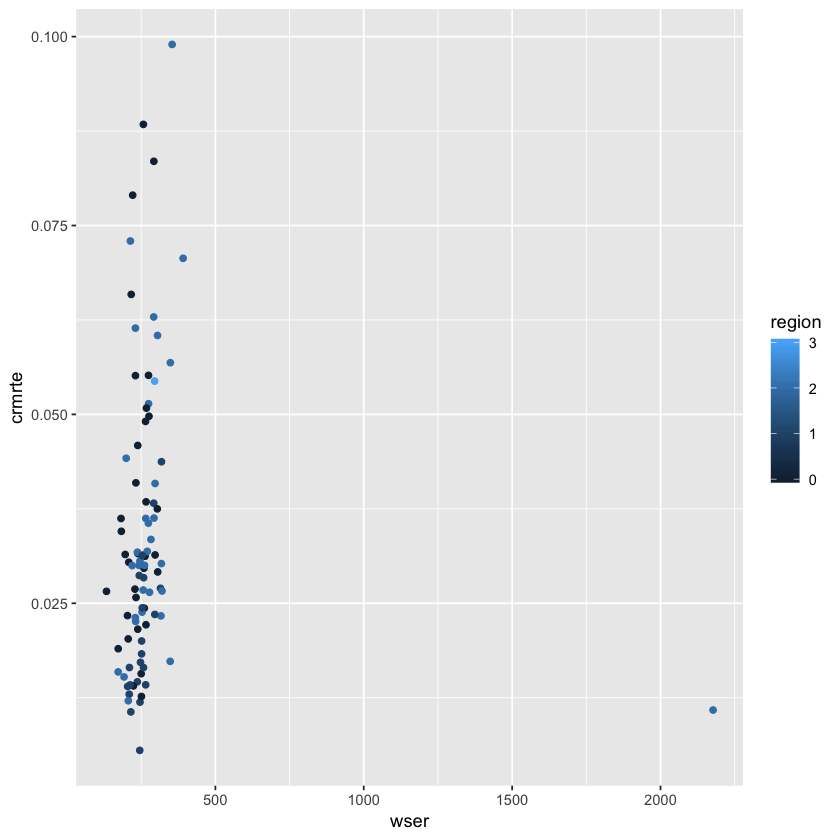

In [16]:
#TODO: visual dipiction of plots for all variables against crmrte

ggplot(data = dfCrime, aes(x = wser, y = crmrte, color = region)) + 
  geom_point() 


TODO: Justify changing the wser value in county 185 to the median

In [17]:
dfCrime$wser[which(dfCrime$county==185)]<- median(dfCrime$wser)
dfCrime$wser[which(dfCrime$county==185)]

[1] 253.1188

## Summary and Results

Commentary on the data. What we believe is operationalized. What we understand as ommitted.

# FL SECTION STARTS HERE

In [66]:
dfCrime$logcrmrte<- log10(dfCrime$crmrte)
dfCrime$crimJustEff <- dfCrime$prbconv * dfCrime$prbarr
dfCrime$logcrimJustEff<- log10(dfCrime$crimJustEff)
dfCrime$allWages<-(dfCrime$wcon+ dfCrime$wtuc + dfCrime$wtrd + dfCrime$wfir + dfCrime$wser + dfCrime$wmfg + dfCrime$wfed + dfCrime$wsta + dfCrime$wloc)

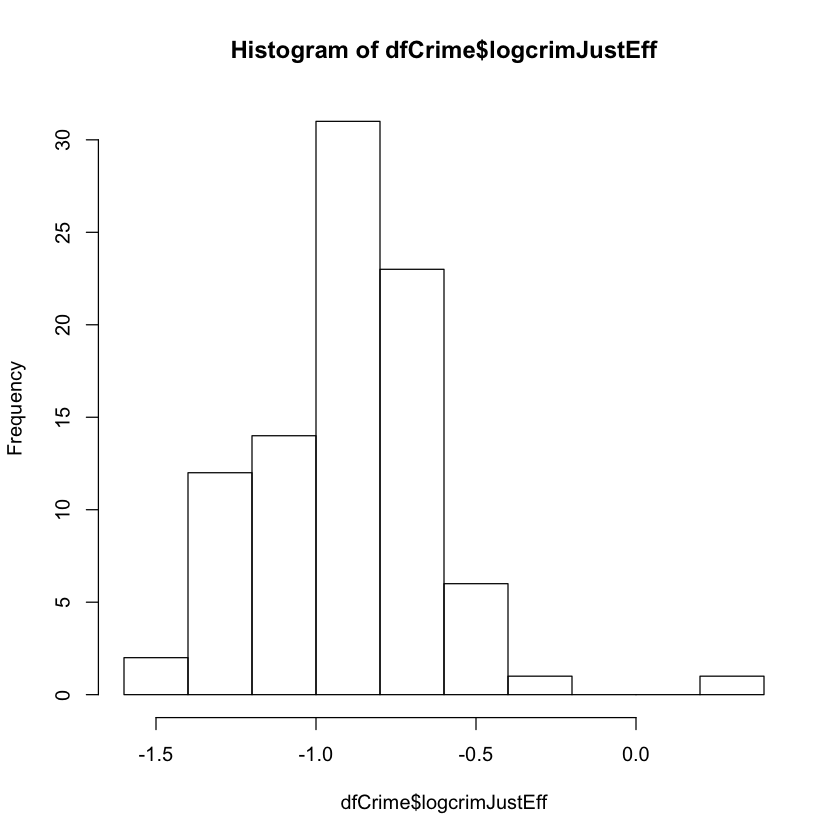

In [43]:
hist(dfCrime$logcrimJustEff)

In [67]:
head(dfCrime)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,logcrmrte,logcrimJustEff,crimJustEff,allWage,logpctmle,logpctmin,logmix,logpctymle,logpctmin80,allWages
1,87,0.0356036,0.298270,0.5275960,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,-1.448506,-0.8030890,0.15736605,3054.890,-1.108624,-0.6942468,-1.0959947,-1.108624,-0.6942468,3054.890
3,87,0.0152532,0.132029,1.4814800,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,-1.816639,-0.7086349,0.19559832,2652.879,-1.082983,-1.1014767,-1.5196093,-1.082983,-1.1014767,2652.879
5,87,0.0129603,0.444444,0.2678570,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,-1.887385,-0.9242800,0.11904743,2553.648,-1.141972,-1.5002401,-0.3324384,-1.141972,-1.5002401,2553.648
7,87,0.0267532,0.364760,0.5254240,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,-1.572624,-0.7174829,0.19165367,2823.133,-1.133493,-0.3195185,-0.5628489,-1.133493,-0.3195185,2823.133
9,87,0.0106232,0.518219,0.4765630,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,-1.973745,-0.6073663,0.24696400,2759.238,-1.150596,-1.7456477,-1.2212279,-1.150596,-1.7456477,2759.238
11,87,0.0146067,0.524664,0.0683761,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,-1.835448,-1.4452144,0.03587448,2586.290,-1.004719,-1.8122819,-0.4954929,-1.004719,-1.8122819,2586.290


In [26]:
summary(dfCrime$prbarr)
summary(dfCrime$prbconv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20495 0.27146 0.29524 0.34487 1.09091 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 


Call:
lm(formula = logcrmrte ~ logcrimJustEff + logpolpc + allWages + 
    density + taxpc + logpctmin80 + pctymle, data = dfCrime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39994 -0.06857  0.02451  0.06488  0.26113 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.671e+00  3.790e-01  -4.409 3.12e-05 ***
logcrimJustEff -3.973e-01  6.025e-02  -6.594 3.88e-09 ***
logpolpc        2.061e-01  9.878e-02   2.087   0.0400 *  
allWages        1.260e-04  5.593e-05   2.253   0.0269 *  
density         3.488e-02  1.301e-02   2.680   0.0089 ** 
taxpc           1.001e-03  1.195e-03   0.838   0.4047    
logpctmin80     2.391e-01  3.284e-02   7.282 1.81e-10 ***
pctymle         8.735e-01  6.292e-01   1.388   0.1688    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1243 on 82 degrees of freedom
Multiple R-squared:  0.7492,	Adjusted R-squared:  0.7278 
F-statistic:    35 on 7 and 82 DF,  p-value

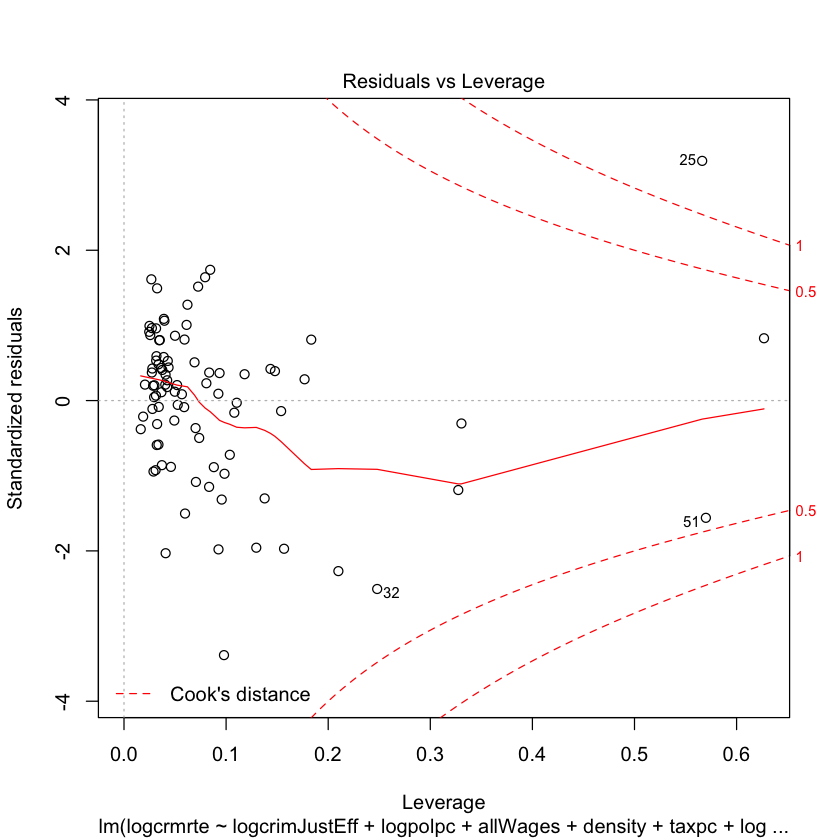

In [92]:
mod3<-lm(logcrmrte~logcrimJustEff + logpolpc + allWages + density + taxpc + logpctmin80 + pctymle , data = dfCrime)
summary(mod3)
plot(mod3, which = 5)

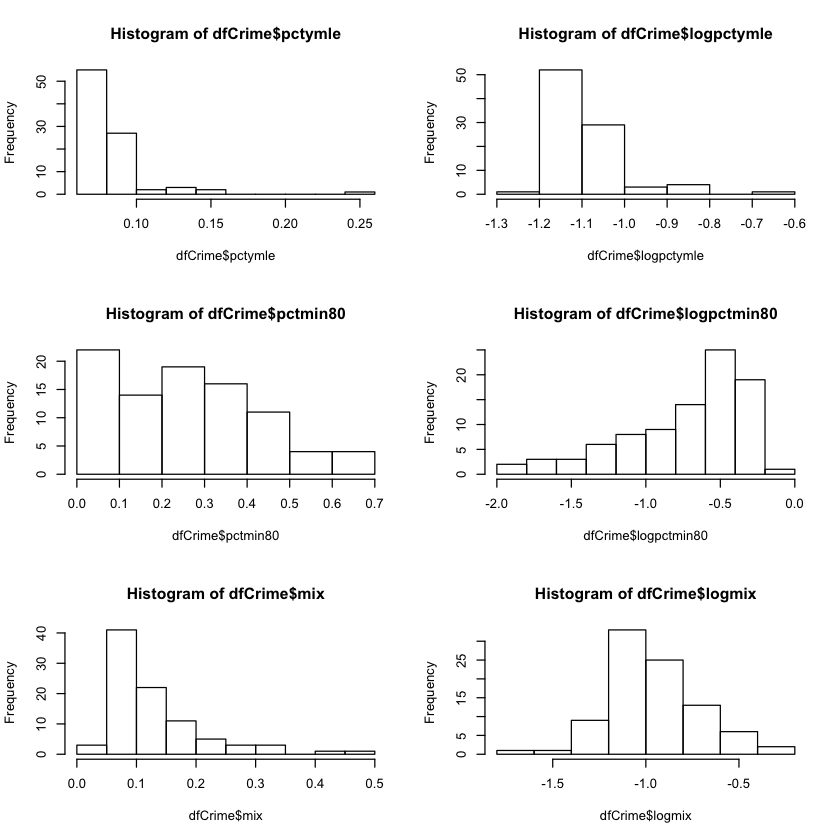

In [85]:
par(mfrow = c(3,2))
dfCrime$logpolpc<-log10(dfCrime$polpc)
dfCrime$logpctymle<-log10(dfCrime$pctymle)
dfCrime$logpctmin80<-log10(dfCrime$pctmin80)
dfCrime$logmix<-log10(dfCrime$mix)
hist(dfCrime$pctymle)
hist(dfCrime$logpctymle)
hist(dfCrime$pctmin80)
hist(dfCrime$logpctmin80)
hist(dfCrime$mix)
hist(dfCrime$logmix)

In [70]:
mod1<-lm(logcrmrte~logcrimJustEff + allWages, data=dfCrime)
summary(mod1)


Call:
lm(formula = logcrmrte ~ logcrimJustEff + allWages, data = dfCrime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47573 -0.09079 -0.00745  0.10173  0.30553 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.746e+00  1.636e-01 -16.783  < 2e-16 ***
logcrimJustEff -4.887e-01  6.772e-02  -7.218 1.87e-10 ***
allWages        2.627e-04  5.552e-05   4.732 8.54e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1687 on 87 degrees of freedom
Multiple R-squared:   0.51,	Adjusted R-squared:  0.4988 
F-statistic: 45.28 on 2 and 87 DF,  p-value: 3.326e-14



Call:
lm(formula = logcrmrte ~ logcrimJustEff + logpolpc + allWages + 
    density + taxpc, data = dfCrime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45295 -0.08129 -0.00167  0.10670  0.30473 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.052e+00  4.465e-01  -4.595 1.51e-05 ***
logcrimJustEff -3.830e-01  7.166e-02  -5.345 7.63e-07 ***
logpolpc        8.723e-02  1.201e-01   0.726  0.46985    
allWages        9.707e-05  7.150e-05   1.358  0.17821    
density         4.867e-02  1.657e-02   2.938  0.00426 ** 
taxpc           1.605e-03  1.469e-03   1.093  0.27744    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1599 on 84 degrees of freedom
Multiple R-squared:  0.5753,	Adjusted R-squared:   0.55 
F-statistic: 22.76 on 5 and 84 DF,  p-value: 2.299e-14


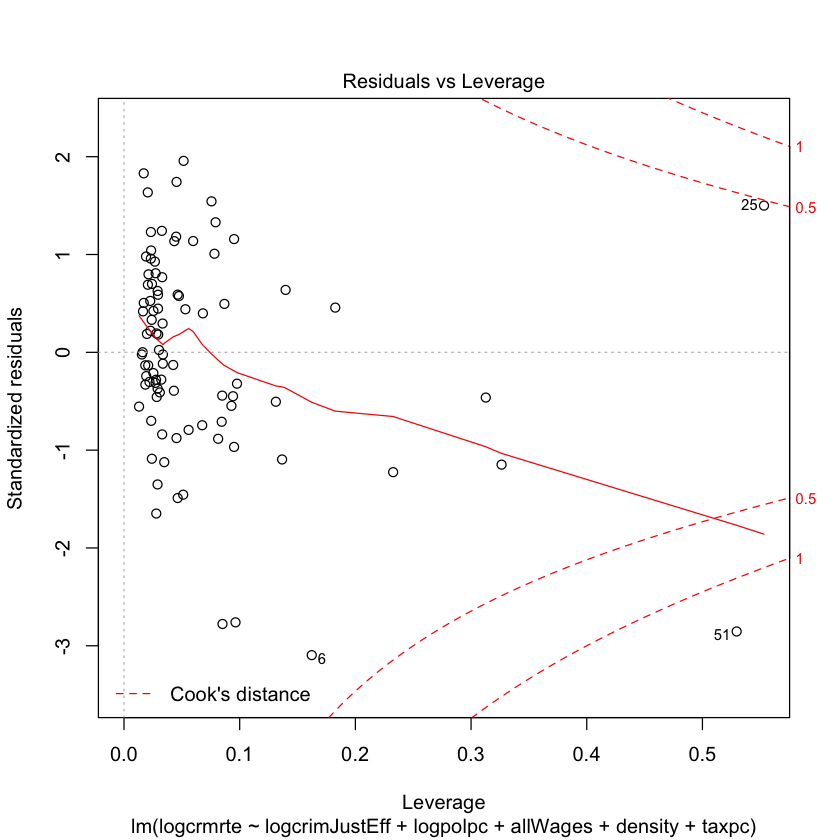

In [81]:
mod2<-lm(logcrmrte~logcrimJustEff + logpolpc + allWages + density + taxpc, data = dfCrime)
summary(mod2)
plot(mod2, which = 5)